Hemodynamic Analysis

# Vasoreactivity in Group 3 Pulmonary Hypertension

## Overview
This repository contains a series of Python scripts designed to analyze the impact of vasoreactivity testing on the prognosis of patients with Group 3 pulmonary hypertension. Vasoreactivity testing is a crucial diagnostic tool that may help predict patient outcomes and guide treatment decisions.

## Project Structure
The project consists of 9 Python scripts, each serving a unique purpose in the data analysis pipeline. Three of these scripts generate visualizations to aid in interpreting the data. The data was collected from a de-identified excel sheet built during a study approved by the Tufts Medical Center Institutional Review Board (IRB# 00004908) Titled “A Prospective study of Vasoreactivity and Mortality in WHO Group 3 Pulmonary Hypertension”. As a non-interventional study, it was not entered into clinicaltrials.gov.

### Python Scripts

1. **hemodynamics.py**
   - **Description**: Calculates the sample size, mean, and standard deviations for all hemodynamic parameters measured in the study.

2. **pft.py**
   - **Description**: Generates a table showing the sample size, mean, and standard deviation of certain pulmonary function test parameters divided into four groups based upon different lung diseases.

3. **kaplan.py**
   - **Description**: We employed Kaplan-Meier survival analysis to investigate the impact of change in PVR and change in mPAP during iNO challenge as well as baseline PVR and baseline mPAP on survival outcomes within our dataset. Two distinct groups were then created based on the median of change in PVR and mPAP or the median baseline PVR and baseline mPAP. A log rank test was used to statistically compare the survival distributions between the two groups.
   - **Generates Image**: Kaplan-Meier estimates survival of two groups of patients in this cohort illustrating the estimated survival probabilities over time (in months). Graph A divides the subjects into two groups based on median baseline PVR of 6.3 wood units. Graph B divides the subjects into two groups based on median baseline mPAP of 35 mm HG. Graph C divides the subjects into two groups based on median reduction in PVR during iNO challenge of 1.2 Wood units. Graph D divides the subjects into two groups based on median reduction in mPAP during iNO challenge of 5 mm HG. Only graph C showed a statistical significance in the survival between the two groups demonstrating that subjects with a greater reduction in PVR during iNO challenge were at an increased risk of mortality than subjects with a lower reduction in PVR. Of note, the average baseline PVR of subjects in the reduction of PVR by more than the median was 9.0 wood units, while the average baseline PVR of subjects in the reduction of PVR by the median or less was only 5.4 wood units. 

4. **scatter.py**
   - **Description**: Provides a statistical summary of the dataset, including mean, median, and standard deviation calculations.
    - **Generates Image**: This scatter plot provides a visual representation of the distribution of survival times relative to mPAP and PVR. Graph A displays the correlation between Baseline PVR and survival for each subject. Graph B displays the correlation between Baseline mPAP and survival for each subject. Graph C displays the correlation between the reduction in PVR during iNO challenge and survival for each subject. Graph D displays the correlation between the reduction in mPAP during iNO challenge and survival for each subject. The pearson correlation coefficient is presented on each graph. 

5. **linear.py**
   - **Description**: Compares the relationship between baseline pulmonary vascular resistance and the reduction in pulmonary vascular resistance for patients in this study.
   - **Generates Image**: Creates a linear regression of baseline PVR in wood units (PVR) compared to reduction in PVR in wood units during inhaled nitric oxide challenge (∆ PVR) with a coefficient of 0.43 and an R-squared value of 0.66.

6. **cox-univariate.py**
   - **Description**: This is a univariate Cox proportional hazards models were applied to each potential predictor to assess its individual association with mortality.
   
7. **cox-stepwise.py**
   - **Description**: Variables demonstrating a p-value of less than 0.10 in these univariate analyses as well as variables considered relevant by clinical expertise including age, sex, and mPAP, were selected for further evaluation. Subsequently, we constructed a multivariate Cox proportional hazards model incorporating these selected variables. A backward stepwise elimination process was implemented to systematically remove variables if their association with the outcome, adjusted for the presence of other variables in the model, resulted in a p-value greater than 0.10.

8. **mann-whitney.py**
   - **Description**: This test starts bysegregating patients into groups based on "∆ PVR" values, and assessing the distribution normality within each group via the Shapiro-Wilk test. Depending on the normality results, the script then chooses between a t-test and a Mann-Whitney U test to statistically compare the PVR between groups with low and high reductions. The outcome explains whether changes in PVR after vasoreactivity testing differ significantly between these groups.

9. **paired_t_tests.py**
   - **Description**: Performs paired t-tests to compare pre- and post-test measurements to evaluate the change in hemodynamics from baseline to hemodynamics during inhaled nitric oxide challenge."Post NO" before each parameter means that value was measured during iNO challenge.

## Requirements
To run these scripts, you will need Python 3.x and the following libraries:
- pandas
- matplotlib
- scipy
- sklearn
- lifelines



# Tables

## hemodynamics.py

In [9]:
import pandas as pd

file_path = "C:\\Users\\danst\\codedan\\group3\\group3_data.xlsx"
df = pd.read_excel(file_path)
 # To display all columns
pd.set_option('display.max_columns', None) 

columns_of_interest = [
    "Age At Cath", "RAP", "RVSP", "RVDP", "mPAP", "PCWP", "CO", "CI", "PVR", 
    "Post NO mPAP", "Post NO PCWP", "Post NO CO", "Post NO CI", "Post NO PVR (dynes-sec/cm5)", 
    "Post NO PVR", "∆ mPAP", "∆ PCWP", "∆ CO", "∆ CI", "∆ PVR", 'BNP level (pg/ml)'
]
# Make lists called "Data" to store the results
data = []

# loop through each column and collect the mean, sample size and standard deviation
for column in columns_of_interest:
    if column in df.columns:
        mean_value = df[column].mean()
        std_dev = df[column].std()
        sample_size = df[column].count()

        data.append([column, sample_size, mean_value, std_dev])
    else:
        data.append([column, 0 , None, None])

# Create DataFrame to neatly display in a tabluar format
results_df = pd.DataFrame(data, columns=["Column", "Sample Size", "Mean", "Standard Deviation"])

print(results_df)

                         Column  Sample Size        Mean  Standard Deviation
0                   Age At Cath           36   69.686004           12.295737
1                           RAP           36    6.416667            3.425743
2                          RVSP           35   54.942857           15.434764
3                          RVDP           35    4.982857            4.481169
4                          mPAP           36   36.472222            9.628785
5                          PCWP           36    9.555556            3.516853
6                            CO           36    4.329167            1.376398
7                            CI           36    2.329444            0.590593
8                           PVR           36    7.057178            4.602534
9                  Post NO mPAP           36   31.138889            8.380770
10                 Post NO PCWP           36   10.277778            3.300313
11                   Post NO CO           36    4.208333            1.374657

## pft.py

In [9]:
import pandas as pd

file_path = "C:\\Users\\danst\\codedan\\group3\\group3_data.xlsx"
df = pd.read_excel(file_path)

# Filter rows where "Days between PFT and cath" is less than 90
df_filtered = df[df["Days between PFT and cath"] < 90]

# Split the data into three groups based on the type of lung disease
group_Total = df_filtered[df_filtered["type of lung disease"].isin(["Obstructive", "Restrictive", "Combined"])]
group_Obstructive = df_filtered[df_filtered["type of lung disease"] == "Obstructive"]
group_Restrictive = df_filtered[df_filtered["type of lung disease"] == "Restrictive"]
group_Combined = df_filtered[df_filtered["type of lung disease"] == "Combined"]

# Define columns of interest
columns_of_interest = [
    "FVC (L)", "FVC (%)", "FeV1 (L)", "FEV1 (%)", 
    "FeV1/FVC", "TLC (L)", "TLC (%)", "DLCO (L)", "DLCO (%)" 
]

# Define a function to calculate stats
def calculate_stats(group):
    stats = {}
    for col in columns_of_interest:
        # Trim the column name to remove extra spaces for display
        col_name = col.strip()
        sample_size = group[col].count()
        mean = round(group[col].mean(), 2)  # Mean
        std_dev = round(group[col].std(), 2)  # Standard Deviation
        stats[col_name] = f"n={sample_size},  Mean ± SD: {mean} ± {std_dev}"
    return stats
# Median ± IQR: {median} ± {iqr/2},

# Calculate stats for each group
stats_Total = calculate_stats(group_Total)
stats_Obstructive = calculate_stats(group_Obstructive)
stats_Restrictive = calculate_stats(group_Restrictive)
stats_Combined = calculate_stats(group_Combined)

# Create a DataFrame from the stats for easier comparison
stats_df = pd.DataFrame([stats_Total, stats_Obstructive, stats_Restrictive, stats_Combined], index=['Total', 'Obstructive', 'Restrictive', 'Combined']).transpose()

# Print the formatted DataFrame with aligned columns
print(stats_df.to_string(index=True, justify='center'))


                      Total                         Obstructive                      Restrictive                       Combined           
FVC (L)     n=18,  Mean ± SD: 2.28 ± 0.91    n=11,  Mean ± SD: 2.58 ± 0.95     n=4,  Mean ± SD: 2.0 ± 0.81     n=3,  Mean ± SD: 1.53 ± 0.2
FVC (%)   n=17,  Mean ± SD: 68.88 ± 23.78   n=10,  Mean ± SD: 75.9 ± 25.99  n=4,  Mean ± SD: 59.75 ± 19.91  n=3,  Mean ± SD: 57.67 ± 17.01
FeV1 (L)    n=18,  Mean ± SD: 1.37 ± 0.57    n=11,  Mean ± SD: 1.27 ± 0.57     n=4,  Mean ± SD: 1.7 ± 0.73    n=3,  Mean ± SD: 1.31 ± 0.33
FEV1 (%)  n=17,  Mean ± SD: 57.29 ± 24.66   n=10,  Mean ± SD: 51.8 ± 27.09   n=4,  Mean ± SD: 67.0 ± 25.01   n=3,  Mean ± SD: 62.67 ± 15.5
FeV1/FVC  n=18,  Mean ± SD: 63.44 ± 21.79  n=11,  Mean ± SD: 50.91 ± 17.49    n=4,  Mean ± SD: 82.0 ± 8.12  n=3,  Mean ± SD: 84.67 ± 13.32
TLC (L)     n=10,  Mean ± SD: 5.07 ± 2.47     n=6,  Mean ± SD: 6.02 ± 2.85    n=2,  Mean ± SD: 3.87 ± 0.78    n=2,  Mean ± SD: 3.43 ± 0.25
TLC (%)     n=10,  Mean ± S

# Regression

## cox-univariate.py - Univariate Analysis

In [2]:
import pandas as pd
from lifelines import CoxPHFitter

# Ensure all columns in table are displayed
pd.set_option('display.max_columns', None)

file_path = "C:\\Users\\danst\\codedan\\group3\\group3_data.xlsx"
df = pd.read_excel(file_path)

# Drop rows with NaN values in the duration column
df = df.dropna(subset=["Time from start date to end date (days)"])

# Check for leading or trailing whitespace and remove it
df.columns = df.columns.str.strip()

# Adjust 'Age At Cath' to reflect a 10-year increase
df['Age At Cath (10-Year Increase)'] = df['Age At Cath'] / 10

# Adjust 'BNP level (pg/ml)' to reflect a 50 pg/ml increase
df['BNP level (50 pg/ml Increase)'] = df['BNP level (pg/ml)'] / 50

# Identify censored data
df["event_occurred"] = df["Death"].astype(str).apply(lambda x: 1 if 'Yes' in x else (0 if 'No' in x else -1))

# One-hot encode the 'Sex' variable
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# One-hot encode the 'vasoreactive' variable 'vasoreactive_yes' will be the new column for patients who are vasoreactive
df = pd.get_dummies(df, columns=['Vasoreactive'], drop_first=True)


# Select the relevant columns for the initial analysis, including covariates
initial_vars = ['Time from start date to end date (days)', 'event_occurred', 'Age At Cath (10-Year Increase)', 'Sex_M', 
                'RAP', 'mPAP', 'PCWP', 'CO', 'CI', 'PVR', 
                'Post NO mPAP', 'Post NO PCWP', 'Post NO CO', 'Post NO CI', 'Post NO PVR', 
                '∆ mPAP', '∆ PCWP', '∆ CO', '∆ CI', '∆ PVR', '% ∆ PVR', '% ∆ mPAP',
                'BNP level (50 pg/ml Increase)', 'Vasoreactive_Yes']  # Add 'vasoreactive_yes' to the list

# Create a Cox Proportional Hazard model for the initial analysis
cph_initial = CoxPHFitter()

# Print the header for variable name
print("Univariate Analysis Summary:")

# Perform univariate analysis for each variable
for var in initial_vars[2:]:  # starting from the 3rd variable
    df_selected_univariate = df[['Time from start date to end date (days)', 'event_occurred', var]]
    cph_initial.fit(df_selected_univariate, duration_col="Time from start date to end date (days)", event_col="event_occurred")
    # print(f"\n{var}:")
    # print(cph_initial.summary)

# Create a list to store the summaries
summary_list = []

# Perform univariate analysis for each variable
for var in initial_vars[2:]:  # starting from the 3rd variable
    df_selected_univariate = df[['Time from start date to end date (days)', 'event_occurred', var]]
    cph_initial.fit(df_selected_univariate, duration_col="Time from start date to end date (days)", event_col="event_occurred")
    
    # Append the summary to the list
    summary_list.append(cph_initial.summary.loc[var])

# Create a DataFrame from the summary list
summary_df = pd.DataFrame(summary_list)



# Print the formatted summary DataFrame with aligned columns
print(summary_df.to_string(index=True, justify='center'))

Univariate Analysis Summary:
                                  coef    exp(coef)  se(coef)  coef lower 95%  coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%  cmp to      z         p     -log2(p)
Age At Cath (10-Year Increase)  0.281576  1.325217   0.207719    -0.125545        0.688697          0.882016             1.991119          0.0   1.355566  0.175237  2.512618
Sex_M                           0.337673  1.401683   0.374827    -0.396975        1.072322          0.672351             2.922156          0.0   0.900877  0.367654  1.443580
RAP                             0.041210  1.042070   0.056496    -0.069521        0.151940          0.932841             1.164090          0.0   0.729424  0.465742  1.102396
mPAP                            0.033371  1.033934   0.021061    -0.007907        0.074650          0.992124             1.077507          0.0   1.584515  0.113077  3.144628
PCWP                           -0.001694  0.998308   0.053448    -0.106450        0.103062          0

## cox-stepwise.py - Step-Wise Analysis

In [8]:
import pandas as pd
from lifelines import CoxPHFitter

# Ensure all columns in table are displayed
pd.set_option('display.max_columns', None)

file_path = "C:\\Users\\danst\\codedan\\group3\\group3_data.xlsx"
df = pd.read_excel(file_path)

# Drop rows with NaN values in the duration column
df = df.dropna(subset=["Time from start date to end date (days)"])

# Drop rows with NaN values in the duration column
df = df.dropna(subset=["BNP level (pg/ml)"])

# Check for leading or trailing whitespace and remove it
df.columns = df.columns.str.strip()

# Adjust 'Age At Cath' to reflect a 10-year increase
df['Age At Cath (10-Year Increase)'] = df['Age At Cath'] / 10

# Adjust 'BNP level (pg/ml)' to reflect a 50 pg/ml increase
df['BNP level (50 pg/ml Increase)'] = df['BNP level (pg/ml)'] / 50

# Identify censored data
df["event_occurred"] = df["Death"].astype(str).apply(lambda x: 1 if 'Yes' in x else (0 if 'No' in x else -1))

# One-hot encode the 'Sex' variable
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Select the relevant columns for the initial analysis, including covariates
initial_vars = ['Time from start date to end date (days)', 'event_occurred', 'Age At Cath (10-Year Increase)', 'Sex_M', 
                'mPAP', 'CO', 'CI', 'PVR', '∆ PVR', 'BNP level (50 pg/ml Increase)']

# Create a Cox Proportional Hazard model for the initial analysis
cph_initial = CoxPHFitter()

# Perform backward stepwise elimination based on likelihood-ratio test statistics
while True:
    cph_initial.fit(df[initial_vars], duration_col="Time from start date to end date (days)", event_col="event_occurred")
    cph_summary = cph_initial.summary
    p_values = cph_summary['p']
    # Get the variable with the highest p-value
    max_p_value = p_values.max()
    # Check if the p-value exceeds the removal criterion (0.10)
    if max_p_value > 0.10:
        var_to_remove = p_values.idxmax()
        initial_vars.remove(var_to_remove)
    else:
        break
    

# Print the summary of the final multivariate model
print("Final Multivariate Model Summary:")
# print(cph_summary)


# Create a DataFrame from the summary
summary_df = pd.DataFrame(summary_list)

# Set the index to the variable names for better readability
summary_df.index = initial_vars[2:]  # Adjust this based on your variable selection

# Print the formatted summary DataFrame with aligned columns
print(summary_df.to_string(index=True, justify='center'))


Final Multivariate Model Summary:
                                  coef    exp(coef)  se(coef)  coef lower 95%  coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%  cmp to      z         p     -log2(p)
Age At Cath (10-Year Increase)  0.281576  1.325217   0.207719    -0.125545        0.688697          0.882016             1.991119          0.0   1.355566  0.175237  2.512618
CI                             -1.034745  0.355317   0.480898    -1.977287       -0.092202          0.138444             0.911921          0.0  -2.151693  0.031422  4.992101
∆ PVR                           0.302920  1.353807   0.105749     0.095655        0.510185          1.100380             1.665600          0.0   2.864511  0.004177  7.903476
BNP level (50 pg/ml Increase)   0.058994  1.060769   0.025977     0.008080        0.109908          1.008113             1.116175          0.0   2.271026  0.023145  5.433129


# Kaplan-Meier figures

## kaplan.py - Kaplan-Meier Curves for baseline and absolute change in PVR and mPAP

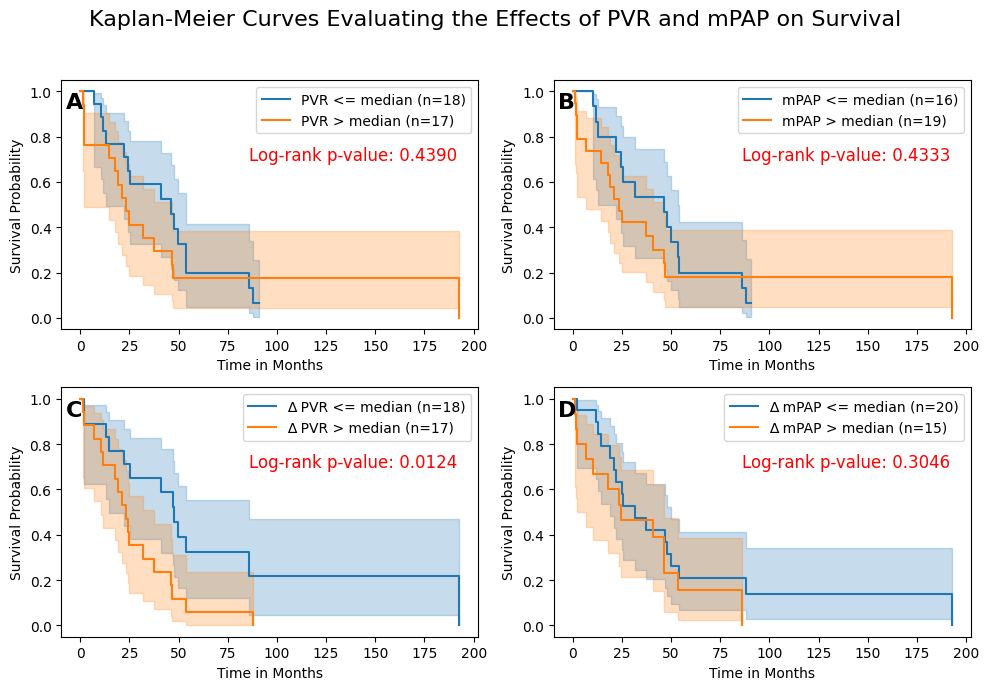

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

df = pd.read_excel("C:\\Users\\danst\\codedan\\group3\\group3_data.xlsx")

# Drop rows with NaN values in the duration column
df = df.dropna(subset=["Time from start date to end date (days)"])

# Convert time from days to months (using average days in a month)
df["Time in months"] = df["Time from start date to end date (days)"] / 30.44

# Identify censored data
df["event_occurred"] = df["Death"].astype(str).apply(lambda x: 1 if x == 'Yes' else 0)

# Create dataframes based on conditions
conditions = [
    ('PVR', 6.3),
    ('mPAP', 35),
    ('∆ PVR', 1.2),
    ('∆ mPAP', 5)
]

fig, axes = plt.subplots(2, 2, figsize=(10, 7))
fig.suptitle('Kaplan-Meier Curves Evaluating the Effects of PVR and mPAP on Survival', fontsize=16)

# Labels for the subplots
labels = ['A', 'B', 'C', 'D']

# x = axes[i//2, i%2] selects the subplot location. i//2 = row, i%2 = column
for i, (variable, median) in enumerate(conditions):
    ax = axes[i//2, i%2]
    df_low = df[df[variable] <= median]
    df_high = df[df[variable] > median]

    kmf_low = KaplanMeierFitter()
    kmf_high = KaplanMeierFitter()

    kmf_low.fit(df_low["Time in months"], event_observed=df_low["event_occurred"], label=f'{variable} <= median (n={len(df_low)})')
    kmf_high.fit(df_high["Time in months"], event_observed=df_high["event_occurred"], label=f'{variable} > median (n={len(df_high)})')

    kmf_low.plot(ax=ax)
    kmf_high.plot(ax=ax)

    # Perform log-rank test
    results = logrank_test(
        durations_A=df_low["Time in months"],
        event_observed_A=df_low["event_occurred"],
        durations_B=df_high["Time in months"],
        event_observed_B=df_high["event_occurred"]
    )

    # Label each subplot
    ax.text(0.01, 0.95, labels[i], transform=ax.transAxes, fontsize=16, fontweight='bold', va='top')

    ax.set_xlabel('Time in Months')
    ax.set_ylabel('Survival Probability')
    ax.text(0.7, 0.7, f'Log-rank p-value: {results.p_value:.4f}', transform=ax.transAxes, ha='center', va='center', color='red', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout

# Save the figure with high resolution (600 dpi for line tone)
fig.savefig("kaplan_meier_curves.jpg", dpi=600, format='jpeg', bbox_inches='tight')

plt.show()

## 5 wood units thresfold for PVR Kaplan-Meier curve

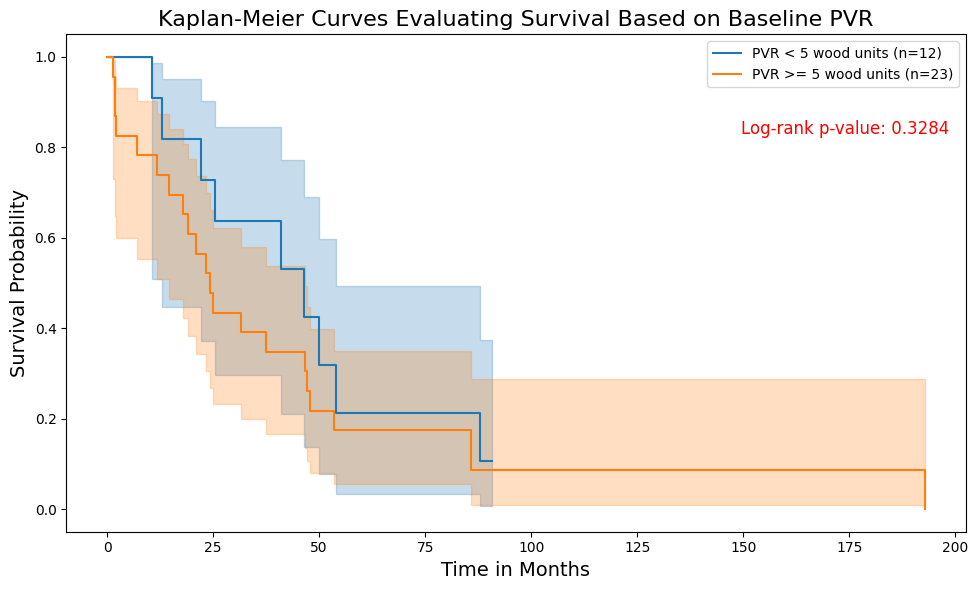

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Load the dataset
df = pd.read_excel("C:\\Users\\danst\\codedan\\group3\\group3_data.xlsx")

# Drop rows with NaN values in the duration column
df = df.dropna(subset=["Time from start date to end date (days)"])

# Convert time from days to months (using average days in a month)
df["Time in months"] = df["Time from start date to end date (days)"] / 30.44

# Identify censored data
df["event_occurred"] = df["Death"].astype(str).apply(lambda x: 1 if x == 'Yes' else 0)

# Define the threshold for PVR
threshold = 5

# Create dataframes based on the threshold of 5 wood units for PVR (greater than or equal to)
df_low = df[df['PVR'] < threshold]  # PVR < 5
df_high = df[df['PVR'] >= threshold]  # PVR >= 5

# Create Kaplan-Meier Fitter objects
kmf_low = KaplanMeierFitter()
kmf_high = KaplanMeierFitter()

# Fit the model for both groups
kmf_low.fit(df_low["Time in months"], event_observed=df_low["event_occurred"], label=f'PVR < 5 wood units (n={len(df_low)})')
kmf_high.fit(df_high["Time in months"], event_observed=df_high["event_occurred"], label=f'PVR >= 5 wood units (n={len(df_high)})')

# Perform log-rank test
results = logrank_test(
    durations_A=df_low["Time in months"],
    event_observed_A=df_low["event_occurred"],
    durations_B=df_high["Time in months"],
    event_observed_B=df_high["event_occurred"]
)

# Plot the Kaplan-Meier curves
plt.figure(figsize=(10, 6))
kmf_low.plot()
kmf_high.plot()

# Add titles and labels
plt.title('Kaplan-Meier Curves Evaluating Survival Based on Baseline PVR', fontsize=16)
plt.xlabel('Time in Months', fontsize=14)
plt.ylabel('Survival Probability', fontsize=14)

# Remove the vertical line indicating the threshold
# plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold: 5 wood units')  # This line is removed

# Add a legend
plt.legend()

# Move the p-value to the right of the graph
plt.text(0.75, 0.8, f'Log-rank p-value: {results.p_value:.4f}', fontsize=12, color='red', transform=plt.gca().transAxes)

# Show the plot
plt.tight_layout()
plt.show()

## percent Change in PVR and MPAP Kaplan-Meier Curves

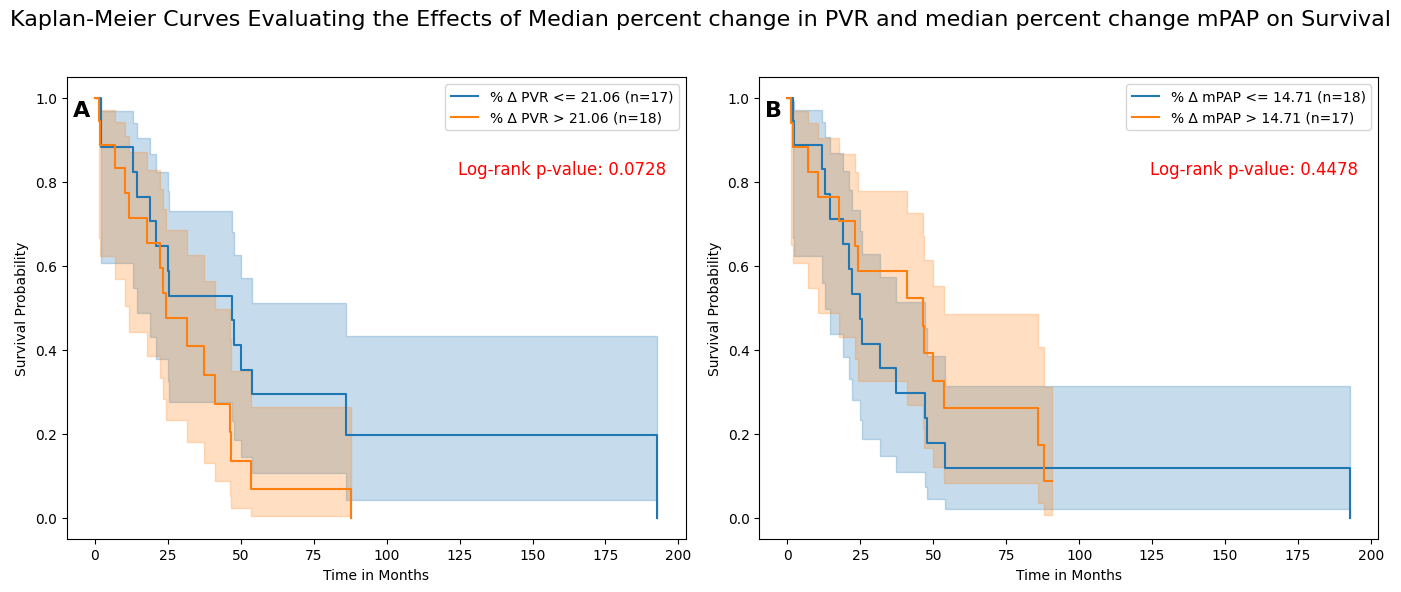

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Load the dataset
df = pd.read_excel("C:\\Users\\danst\\codedan\\group3\\group3_data.xlsx")

# Drop rows with NaN values in the duration column
df = df.dropna(subset=["Time from start date to end date (days)"])

# Convert time from days to months
df["Time in months"] = df["Time from start date to end date (days)"] / 30.44

# Identify censored data
df["event_occurred"] = df["Death"].astype(str).apply(lambda x: 1 if x == 'Yes' else 0)

# Create dataframes based on median conditions
conditions = [
    ('% ∆ PVR', 21.06), # Median % ∆ PVR
    ('% ∆ mPAP', 14.71) # Median % ∆ mPAP
]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Create a 1x2 subplot grid
fig.suptitle('Kaplan-Meier Curves Evaluating the Effects of Median percent change in PVR and median percent change mPAP on Survival', fontsize=16)

# Labels for the subplots
labels = ['A', 'B']

# Loop through the conditions and plot only the median-based graphs
for i, (variable, threshold) in enumerate(conditions):
    ax = axes[i]
    df_low = df[df[variable] <= threshold]
    df_high = df[df[variable] > threshold]

    kmf_low = KaplanMeierFitter()
    kmf_high = KaplanMeierFitter()

    kmf_low.fit(df_low["Time in months"], event_observed=df_low["event_occurred"], label=f'{variable} <= {threshold} (n={len(df_low)})')
    kmf_high.fit(df_high["Time in months"], event_observed=df_high["event_occurred"], label=f'{variable} > {threshold} (n={len(df_high)})')

    kmf_low.plot(ax=ax)
    kmf_high.plot(ax=ax)

    # Perform log-rank test
    results = logrank_test(
        durations_A=df_low["Time in months"],
        event_observed_A=df_low["event_occurred"],
        durations_B=df_high["Time in months"],
        event_observed_B=df_high["event_occurred"]
    )

    # Label each subplot
    ax.text(0.01, 0.95, labels[i], transform=ax.transAxes, fontsize=16, fontweight='bold', va='top')

    ax.set_xlabel('Time in Months')
    ax.set_ylabel('Survival Probability')
    ax.text(0.8, 0.8, f'Log-rank p-value: {results.p_value:.4f}', transform=ax.transAxes, ha='center', va='center', color='red', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout
plt.show()


# Linear Regression

## Comparing Baseline PVR to absolute change in PVR

Coefficient: 0.418303331918872
Intercept: -1.311972528703744
R-squared: 0.6636207754428499


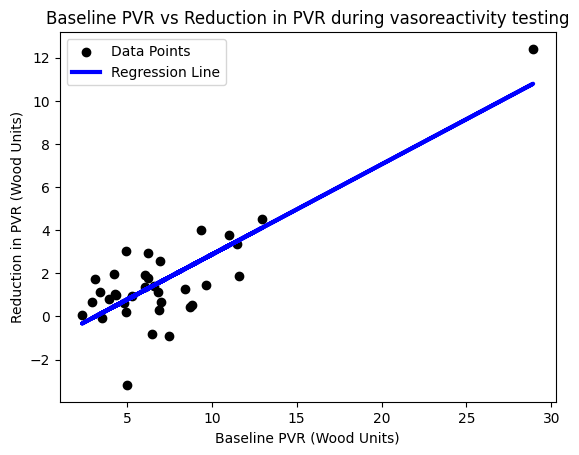

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

file_path = "C:\\Users\\danst\\codedan\\group3\\group3_data.xlsx"
df = pd.read_excel(file_path)

# Drop rows with NaN values in the duration column
df = df.dropna(subset=["Time from start date to end date (days)"])

# Select the relevant columns for the analysis
X = df[['PVR']]
y = df['∆ PVR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the coefficients of the linear regression model
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
print("R-squared:", r2_score(y, model.predict(X)))

# Visualize the regression line
plt.scatter(X, y, color='black', label='Data Points')
plt.plot(X, model.predict(X), color='blue', linewidth=3, label='Regression Line')

plt.title('Baseline PVR vs Reduction in PVR during vasoreactivity testing')
plt.xlabel('Baseline PVR (Wood Units)')
plt.ylabel('Reduction in PVR (Wood Units)')
plt.legend()

# Save the figure with high resolution (1200 DPI)
plt.savefig("linear.jpg", dpi=1200, format='jpeg', bbox_inches='tight')

plt.show()

# Scatter Plots

## Baseline and Absolute change in PVR and mPAP vs mortality

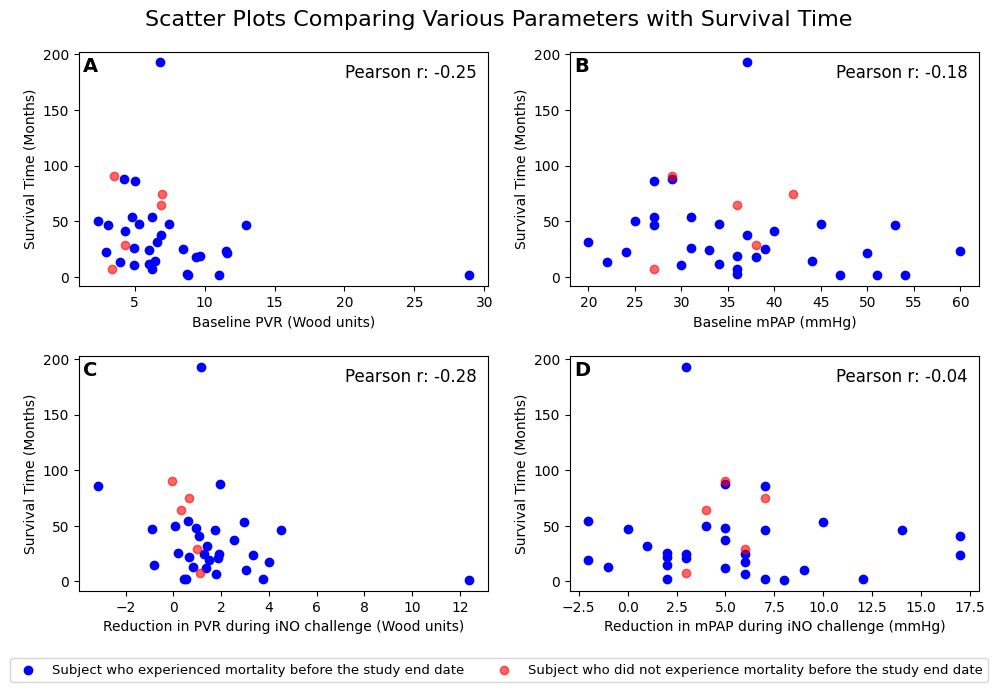

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

file_path = "C:\\Users\\danst\\codedan\\group3\\group3_data.xlsx"
df = pd.read_excel(file_path)

# Drop rows with NaN values in the relevant columns
df = df.dropna(subset=["Time from start date to end date (days)", "∆ mPAP", "∆ PVR", "mPAP", "PVR"])

# Convert time from days to months (using average days in a month)
df["Time in months"] = df["Time from start date to end date (days)"] / 30.44

# Identify censored data
df['censored'] = df['Death'] == 'No'

# Set up the matplotlib figure

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
fig.suptitle('Scatter Plots Comparing Various Parameters with Survival Time', fontsize=16)

# Function to plot data and annotate with correlation coefficient and labels A, B, C, D
def plot_data(ax, x, y, xlabel, ylabel, label):
    # Non-censored data
    ax.scatter(df.loc[~df['censored'], x], df.loc[~df['censored'], y], color='blue', label='Subject who experienced mortality before the study end date')
    # Censored data
    ax.scatter(df.loc[df['censored'], x], df.loc[df['censored'], y], color='red', label='Subject who did not experience mortality before the study end date', alpha=0.6)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # Calculate and annotate Pearson correlation
    correlation, _ = pearsonr(df[x], df[y])
    ax.text(0.65, 0.95, f'Pearson r: {correlation:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')

    # Label the plot as A, B, C, or D
    ax.text(0.01, 0.98, label, transform=ax.transAxes, fontsize=14, fontweight='bold', verticalalignment='top')

# Scatter plot for PVR
plot_data(axes[0, 0], "PVR", "Time in months", 'Baseline PVR (Wood units)', 'Survival Time (Months)', 'A')

# Scatter plot for mPAP
plot_data(axes[0, 1], "mPAP", "Time in months", 'Baseline mPAP (mmHg)', 'Survival Time (Months)', 'B')

# Scatter plot for ∆ PVR
plot_data(axes[1, 0], "∆ PVR", "Time in months", 'Reduction in PVR during iNO challenge (Wood units)', 'Survival Time (Months)', 'C')

# Scatter plot for ∆ mPAP
plot_data(axes[1, 1], "∆ mPAP", "Time in months", 'Reduction in mPAP during iNO challenge (mmHg)', 'Survival Time (Months)', 'D')

# Add a single legend outside of the subplots
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, 0.01), fontsize=9.5)

# Adjust layout to reduce white space
plt.subplots_adjust(left=0.08, right=0.98, top=0.92, bottom=0.15, hspace=0.3, wspace=0.2)

# Save the figure with high resolution (1200 dpi for line tone)
fig.savefig("scatter_plots.jpg", dpi=1200, format='jpeg', bbox_inches='tight')

# Show the plot
plt.show()



# Paired_t_tests.py

## This code cell performs a paired T-test to compare the means of various hemodynamic parameters measured before and after a treatment inhaled nitric oxide challenge.

In [10]:
import pandas as pd
from scipy.stats import ttest_rel

file_path = "C:\\Users\\danst\\codedan\\group3\\group3_data.xlsx"
df = pd.read_excel(file_path)

# Ensure the data does not contain NaN values in the columns of interest
df = df.dropna(subset=['mPAP', 'Post NO mPAP', 'PCWP', 'Post NO PCWP', 'CO', 'Post NO CO', 'CI', 'Post NO CI', 'PVR', 'Post NO PVR'])

# Performing paired t-tests
results = {}

# List of parameters to test
parameters = ['mPAP', 'PCWP', 'CO', 'CI', 'PVR']

for param in parameters:
    # Compute the t-test for the pair
    stat, p_value = ttest_rel(df[f'Post NO {param}'], df[param])
    results[param] = (stat, p_value)

# Print the results in a formatted table
print(f"{'Parameter':<15} {'T-statistic':<15} {'P-value':<15}")
print("="*45)
for param, result in results.items():
    stat, p_value = result
    print(f"{param:<15} {stat:<15.3f} {p_value:<15.3f}")

Parameter       T-statistic     P-value        
mPAP            -7.085          0.000          
PCWP            1.534           0.134          
CO              -1.251          0.219          
CI              -1.148          0.259          
PVR             -3.974          0.000          


# mann-whitney.py 

## This code cell performs the Mann-Whitney U test, a non-parametric statistical test used to compare differences between two independent groups. It is particularly useful when the data does not meet the assumptions required for a t-test, such as normality.

In [8]:
import pandas as pd
from scipy import stats

df = pd.read_excel("C:\\Users\\danst\\codedan\\group3\\group3_data.xlsx")

# Drop rows with NaN values in relevant columns
df = df.dropna(subset=["Time from start date to end date (days)", "∆ PVR"])

# Startify into 2 different dataframes
df_low_delta_pvr = df[df['∆ PVR'] <= 1.2]
df_high_delta_pvr = df[df['∆ PVR'] > 1.2]

# Normality test
stat, p_low = stats.shapiro(df_low_delta_pvr['PVR'])
stat, p_high = stats.shapiro(df_high_delta_pvr['PVR'])

print(f"Normality test for Low Delta PVR Group: p = {p_low:.3f}")
print(f"Normality test for High Delta PVR Group: p = {p_high:.3f}")

# Perform t-test or Mann-Whitney U test based on normality test results
if p_low > 0.05 and p_high > 0.05:
    # Both groups are normally distributed
    t_stat, p_value = stats.ttest_ind(df_low_delta_pvr['PVR'], df_high_delta_pvr['PVR'])
    print(f"t-test p-value: {p_value:.3f}")
else:
    # Use non-parametric test if any group does not follow normal distribution
    u_stat, p_value = stats.mannwhitneyu(df_low_delta_pvr['PVR'], df_high_delta_pvr['PVR'])
    print(f"Mann-Whitney U test p-value: {p_value:.3f}")


Normality test for Low Delta PVR Group: p = 0.527
Normality test for High Delta PVR Group: p = 0.000
Mann-Whitney U test p-value: 0.015


# Comparing drops in PVR with drops in wedge pressure

In [18]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset
file_path = "C:\\Users\\danst\\codedan\\group3\\group3_data.xlsx"
df = pd.read_excel(file_path)

# Ensure the data does not contain NaN values in the relevant columns
df = df.dropna(subset=['PVR', 'Post NO PVR', 'PCWP', 'Post NO PCWP', 'mPAP', 'Post NO mPAP', 'CO', 'Post NO CO'])

# Step 1: Calculate the change in PVR, PCWP, mPAP, and CO
df['PVR_change'] = df['Post NO PVR'] - df['PVR']
df['PCWP_change'] = df['Post NO PCWP'] - df['PCWP']
df['mPAP_change'] = df['Post NO mPAP'] - df['mPAP']
df['CO_change'] = df['Post NO CO'] - df['CO']

# Step 2: Define the groups based on the absolute median drop in PVR
median_pvr_change = df['PVR_change'].median()
group_high_drop = df[df['PVR_change'] <= median_pvr_change]  # More negative values
group_low_drop = df[df['PVR_change'] > median_pvr_change]    # Less negative or positive values

# Step 3: Calculate the mean change in PVR, PCWP, mPAP, and CO for both groups
mean_pvr_change_high = group_high_drop['PVR_change'].mean()
mean_pvr_change_low = group_low_drop['PVR_change'].mean()
mean_pcwp_change_high = group_high_drop['PCWP_change'].mean()
mean_pcwp_change_low = group_low_drop['PCWP_change'].mean()
mean_mpap_change_high = group_high_drop['mPAP_change'].mean()
mean_mpap_change_low = group_low_drop['mPAP_change'].mean()
mean_co_change_high = group_high_drop['CO_change'].mean()
mean_co_change_low = group_low_drop['CO_change'].mean()

# Step 4: Perform t-tests for each parameter
t_test_pvr = ttest_ind(group_high_drop['PVR_change'], group_low_drop['PVR_change'], equal_var=False)
t_test_pcwp = ttest_ind(group_high_drop['PCWP_change'], group_low_drop['PCWP_change'], equal_var=False)
t_test_mpap = ttest_ind(group_high_drop['mPAP_change'], group_low_drop['mPAP_change'], equal_var=False)
t_test_co = ttest_ind(group_high_drop['CO_change'], group_low_drop['CO_change'], equal_var=False)

# Step 5: Print the results in a formatted table
print(f"{'Group':<20} {'Mean PVR Change (units)':<30} {'Mean PCWP Change (units)':<30} {'Mean mPAP Change (units)':<30} {'Mean CO Change (units)':<30}")
print("="*160)
print(f"{'High Change Group':<20} {mean_pvr_change_high:<30.2f} {mean_pcwp_change_high:<30.2f} {mean_mpap_change_high:<30.2f} {mean_co_change_high:<30.2f}")
print(f"{'Low Change Group':<20} {mean_pvr_change_low:<30.2f} {mean_pcwp_change_low:<30.2f} {mean_mpap_change_low:<30.2f} {mean_co_change_low:<30.2f}")

# Step 6: Print t-test results
print("\nT-Test Results:")
print(f"{'Parameter':<20} {'T-statistic':<20} {'P-value':<20}")
print("="*60)
print(f"{'PVR Change':<20} {t_test_pvr.statistic:<20.4f} {t_test_pvr.pvalue:<20.4f}")
print(f"{'PCWP Change':<20} {t_test_pcwp.statistic:<20.4f} {t_test_pcwp.pvalue:<20.4f}")
print(f"{'mPAP Change':<20} {t_test_mpap.statistic:<20.4f} {t_test_mpap.pvalue:<20.4f}")
print(f"{'CO Change':<20} {t_test_co.statistic:<20.4f} {t_test_co.pvalue:<20.4f}")

Group                Mean PVR Change (units)        Mean PCWP Change (units)       Mean mPAP Change (units)       Mean CO Change (units)        
High Change Group    -2.92                          1.72                           -6.56                          0.13                          
Low Change Group     -0.22                          -0.28                          -4.11                          -0.38                         

T-Test Results:
Parameter            T-statistic          P-value             
PVR Change           -4.1214              0.0004              
PCWP Change          2.2433               0.0315              
mPAP Change          -1.6642              0.1054              
CO Change            2.9113               0.0067              


# Significant ∆ PCWP- Indicate how many patients experienced a significant increase in PAWP during iNO testing, suggesting latent left heart failure.


In [11]:
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\danst\\codedan\\group3\\group3_data.xlsx"
df = pd.read_excel(file_path)

# Ensure the data does not contain NaN values in the relevant column
df = df.dropna(subset=['∆ PCWP'])  # Adjust column name as necessary

# Define the threshold for significant increase in PCWP
threshold_increase = 2  # Example threshold in mmHg

# Count the number of patients with a significant increase in PCWP
significant_increase_count = df[df['∆ PCWP'] > threshold_increase].shape[0]

# Calculate descriptive statistics
mean_change = df['∆ PCWP'].mean()
std_change = df['∆ PCWP'].std()
median_change = df['∆ PCWP'].median()
q1_change = df['∆ PCWP'].quantile(0.25)
q3_change = df['∆ PCWP'].quantile(0.75)
max_change = df['∆ PCWP'].max()

# Print the results
print(f'Number of patients with a significant increase in PCWP during iNO testing: {significant_increase_count}')
print(f'Mean change in PCWP: {mean_change:.2f} ± {std_change:.2f}')
print(f'Median change in PCWP: {median_change:.2f} [{q1_change:.2f}, {q3_change:.2f}]')
print(f'Maximum change in PCWP: {max_change:.2f}')

Number of patients with a significant increase in PCWP during iNO testing: 5
Mean change in PCWP: -0.52 ± 3.06
Median change in PCWP: -1.00 [-2.00, 2.00]
Maximum change in PCWP: 6.92


## Histogram for change in wedge pressure for each patient

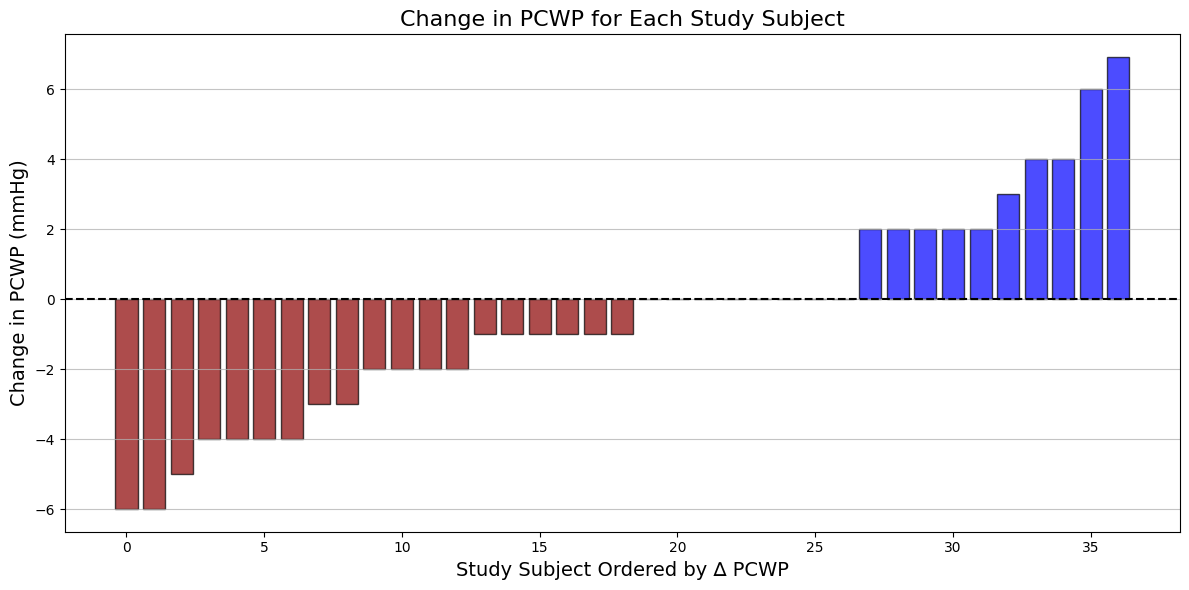

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:\\Users\\danst\\codedan\\group3\\group3_data.xlsx"
df = pd.read_excel(file_path)


# Sort the DataFrame by ∆ PCWP in ascending order
df_sorted = df.sort_values(by='∆ PCWP', ascending=True).reset_index(drop=True)

# Create a vertical bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(df_sorted.index, df_sorted['∆ PCWP'], color=['blue' if x > 0 else 'darkred' for x in df_sorted['∆ PCWP']], alpha=0.7, edgecolor='black')

# Add titles and labels
plt.title('Change in PCWP for Each Study Subject', fontsize=16)
plt.xlabel('Study Subject Ordered by ∆ PCWP', fontsize=14)
plt.ylabel('Change in PCWP (mmHg)', fontsize=14)

# Draw a horizontal line at zero for reference
plt.axhline(y=0, color='black', linewidth=1.5, linestyle='--')

# Show grid
plt.grid(axis='y', alpha=0.75)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Show the plot
plt.show()



# Details on vasoreactive patients

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:\\Users\\danst\\codedan\\group3\\group3_data.xlsx"
df = pd.read_excel(file_path)


# Sort the DataFrame by ∆ PCWP in ascending order
df_sorted = df.sort_values(by='Vasoreactive' = yes,.reset_index(drop=True)

# Create a vertical bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(df_sorted.index, df_sorted['∆ PCWP'], color=['blue' if x > 0 else 'darkred' for x in df_sorted['∆ PCWP']], alpha=0.7, edgecolor='black')

# Add titles and labels
plt.title('Change in PCWP for Each Study Subject', fontsize=16)
plt.xlabel('Study Subject Ordered by ∆ PCWP', fontsize=14)
plt.ylabel('Change in PCWP (mmHg)', fontsize=14)

# Draw a horizontal line at zero for reference
plt.axhline(y=0, color='black', linewidth=1.5, linestyle='--')

# Show grid
plt.grid(axis='y', alpha=0.75)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Show the plot
plt.show()
